In [1]:
import numpy as np
import pandas as pd

# Install requests library to fetch data from the web
! pip install requests

In [2]:
# Import the requests library
import requests

In [3]:
# Define the URL for the World Bank countries API
url = "https://api.worldbank.org/countries?format=json&per_page=300"

# Send a GET request to the API and store the response
response = requests.get(url)
# Check the status code of the response
response.status_code

200

In [4]:
# Parse the JSON response
data = response.json()
# Print the first element (metadata) and the length of the data
print(data[0])
print(len(data))

# The data list contains two elements:
# 1- metadata about the request
# 2 - Actual data (list of countries)

{'page': 1, 'pages': 1, 'per_page': '300', 'total': 296}
2


In [5]:
# Extract the list of countries from the data
countries= data[1]
# Convert the list of countries into a pandas DataFrame
countries= pd.DataFrame(countries)

In [6]:
# Access the income level information for a specific country (index 6)
countries["incomeLevel"][6]

{'id': 'UMC', 'iso2code': 'XT', 'value': 'Upper middle income'}

In [7]:
# Apply a lambda function to extract the 'value' from the 'region' column
countries["region"]= countries["region"].apply(lambda x:x["value"])

In [8]:
# Apply a lambda function to extract the 'value' from the 'incomeLevel' column
countries["incomeLevel"]= countries["incomeLevel"].apply(lambda x:x["value"])

In [9]:
# Apply a lambda function to extract the 'value' from the 'lendingType' column
countries["lendingType"]= countries["lendingType"].apply(lambda x:x["value"])

In [10]:
# Drop the 'adminregion' columns from the DataFrame
countries.drop(columns=["adminregion","adminregion"], inplace=True)

In [11]:
# Drop the 'capitalCity' column from the DataFrame
countries.drop(columns=["capitalCity"], inplace=True)

In [12]:
# Get the unique values in the 'region' column
countries["region"].unique()

array(['Latin America & Caribbean ', 'Aggregates',
       'Middle East, North Africa, Afghanistan & Pakistan',
       'Sub-Saharan Africa ', 'Europe & Central Asia',
       'East Asia & Pacific', 'South Asia', 'North America'], dtype=object)

In [13]:
# Rename the 'iso2Code' column to 'country_id'
countries.rename(columns={"iso2Code":"country_id"}, inplace=True)

In [14]:
# Filter the DataFrame to show only rows where the 'region' is 'Aggregates'
countries[countries["region"]=="Aggregates"]

,id,country_id,name,region,incomeLevel,lendingType,longitude,latitude
1,AFE,ZH,Africa Eastern and Southern,Aggregates,Aggregates,Aggregates,,
3,AFR,A9,Africa,Aggregates,Aggregates,Aggregates,,
4,AFW,ZI,Africa Western and Central,Aggregates,Aggregates,Aggregates,,
8,ARB,1A,Arab World,Aggregates,Aggregates,Aggregates,,
18,BEA,B4,East Asia & Pacific (IBRD-only countries),Aggregates,Aggregates,Aggregates,,
...,...,...,...,...,...,...,...,...
269,TSA,T5,South Asia (IDA & IBRD),Aggregates,Aggregates,Aggregates,,
270,TSS,T6,Sub-Saharan Africa (IDA & IBRD countries),Aggregates,Aggregates,Aggregates,,
278,UMC,XT,Upper middle income,Aggregates,Aggregates,Aggregates,,
288,WLD,1W,World,Aggregates,Aggregates,Aggregates,,


In [15]:
# code for indicators
# Define the base URL for the World Bank indicators API
base_url="https://api.worldbank.org/v2/indicators?format=json"
# Send a GET request to the API and store the response
response= requests.get(base_url)
# Check the status code of the response
response.status_code

200

In [16]:
# Parse the JSON response containing indicator data
indicators_data = response.json()

In [17]:
# Display the metadata (first element) of the indicators data
indicators_data[0]#meta data

{'page': 1, 'pages': 525, 'per_page': '50', 'total': 26235}

In [18]:
# Display the actual indicator data (second element)
indicators_data[1]

[{'id': '1.0.HCount.1.90usd',
  'name': 'Poverty Headcount ($1.90 a day)',
  'unit': '',
  'source': {'id': '37', 'value': 'LAC Equity Lab'},
  'sourceNote': 'The poverty headcount index measures the proportion of the population with daily per capita income (in 2011 PPP) below the poverty line.',
  'sourceOrganization': 'LAC Equity Lab tabulations of SEDLAC (CEDLAS and the World Bank).',
  'topics': [{'id': '11', 'value': 'Poverty '}]},
 {'id': '1.0.HCount.2.5usd',
  'name': 'Poverty Headcount ($2.50 a day)',
  'unit': '',
  'source': {'id': '37', 'value': 'LAC Equity Lab'},
  'sourceNote': 'The poverty headcount index measures the proportion of the population with daily per capita income (in 2005 PPP) below the poverty line.',
  'sourceOrganization': 'LAC Equity Lab tabulations of SEDLAC (CEDLAS and the World Bank).',
  'topics': [{'id': '11', 'value': 'Poverty '}]},
 {'id': '1.0.HCount.Mid10to50',
  'name': 'Middle Class ($10-50 a day) Headcount',
  'unit': '',
  'source': {'id': '37

In [19]:
# Convert the list of indicators into a pandas DataFrame
pd.DataFrame(indicators_data[1])

,id,name,unit,source,sourceNote,sourceOrganization,topics
0,1.0.HCount.1.90usd,Poverty Headcount ($1.90 a day),,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"
1,1.0.HCount.2.5usd,Poverty Headcount ($2.50 a day),,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"
2,1.0.HCount.Mid10to50,Middle Class ($10-50 a day) Headcount,,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"
3,1.0.HCount.Ofcl,Official Moderate Poverty Rate-National,,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty headcount index measures the propo...,LAC Equity Lab tabulations of data from Nation...,"[{'id': '11', 'value': 'Poverty '}]"
4,1.0.HCount.Poor4uds,Poverty Headcount ($4 a day),,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"
5,1.0.HCount.Vul4to10,Vulnerable ($4-10 a day) Headcount,,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"
6,1.0.PGap.1.90usd,Poverty Gap ($1.90 a day),,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty gap captures the mean aggregate in...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"
7,1.0.PGap.2.5usd,Poverty Gap ($2.50 a day),,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty gap captures the mean aggregate in...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"
8,1.0.PGap.Poor4uds,Poverty Gap ($4 a day),,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty gap captures the mean aggregate in...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"
9,1.0.PSev.1.90usd,Poverty Severity ($1.90 a day),,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty severity index combines informatio...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"


In [20]:
# Import the time module to introduce delays between requests
import time
# Define the base URL for fetching indicator data for all countries
base_url="https://api.worldbank.org/v2/countries/all/indicators/{}?format=json&per_page=1000&page={}"

# Define a dictionary mapping indicator categories to lists of indicator codes
indicator_groups = {
"economic_activity_growth": [
"NY.GDP.MKTP.KD.ZG", # GDP growth (annual %)
"NY.GDP.PCAP.CD" # GDP per capita (current US$)
],
"labour_market_indicators": [
"SL.UEM.TOTL.ZS", # Unemployment total
"SL.UEM.1524.ZS", # Unemployment youth total (ages 15–24)
"SL.TLF.TOTL.IN" # Labour force, total
],
"trade_globalization": [
"NE.EXP.GNFS.CD", # Exports of goods and services (current US$)
"NE.IMP.GNFS.CD" # Imports of goods and services (current US$)
],
"poverty_inequality": [
"SI.POV.NAHC", # Poverty headcount ratio at national poverty lines (% of population)
"SI.POV.GINI" # Gini index (measure of income inequality)
],
"environmental_indicators": [
"EG.FEC.RNEW.ZS", # Renewable energy consumption (% of total final energy consumption)
"AG.LND.FRST.ZS" # Forest area (% of land area)
],
"health_indicators": [
"SP.DYN.LE00.IN", # Life expectancy at birth
"SP.DYN.IMRT.IN", # Infant mortality rate
"SH.H2O.BASW.ZS", # Access to at least basic water services (% of population)
"SH.XPD.CHEX.GD.ZS", # Current health expenditure (% of GDP)
"SH.IMM.IDPT", # Immunization, DPT (% of children ages 12–23 months)
"SH.IMM.MEAS", # Immunization, measles (% of children ages 12–23 months)
"SH.MMR.RISK.ZS", # Risk of maternal death
"SH.DTH.COMM.ZS", # Deaths from communicable diseases (% of total)
"SH.TBS.INCD", # Tuberculosis incidence (per 100,000 people)
"SH.STA.BRTC.ZS", # Births attended by skilled health staff (%)
"SH.STA.MMRT", # Maternal mortality ratio (modeled estimate, per 100,000 live births)
"SP.POP.65UP.TO.ZS", # Population ages 65 and above (% of total population)
"SH.HIV.INCD.ZS" # HIV incidence rate (per 1,000 uninfected population ages 15–49)
],
"technology_indicators": [
"IT.NET.USER.ZS", # Individuals using the Internet (% of population)
"IT.CEL.SETS.P2" # Mobile cellular subscriptions (per 100 people)
]}

# Dictionary to store dataframes for each indicator category
category_dataframes={}
# Iterate through each indicator category and its list of indicators
for category,indicators  in indicator_groups.items():
  print(f"Fetch intofmation  for category:{category}")
  # List to store dataframes for the current category
  all_dfs_for_category=[]

  # Iterate through each indicator code in the current category
  for indicator_code in indicators:
    print(f"Fetching indicator: {indicator_code}")
    page=1

    # Loop through pages to fetch all data for the current indicator
    while True:
      # Construct the URL for the current indicator and page
      url = base_url.format(indicator_code, page)
      # Send a GET request to the API
      response= requests.get(url)
      # Check if the request was successful
      if response.status_code!=200:
        print(f"Failed to fetch data for indicator {indicator_code} on page {page}. Status code: {response.status_code}")
        print(f"Response content: {response.text}")
        break

      # Parse the JSON response
      data = response.json()
      # Check if there is data on the current page
      if len(data)<2:
        print(f"No data for indicator {indicator_code} on page {page}")
        break

      # Get the total number of pages from the metadata
      total_pages = data[0]["pages"]
      # Extract the records (actual data)
      record= data[1]

      # Normalize the JSON records into a pandas DataFrame
      df= pd.json_normalize(record)
      # Select and rename relevant columns
      df= df[[
          "country.id","country.value","indicator.id",
          "indicator.value","date","value"
          ]].rename(columns={
              "country.id":"country_id",
              "country.value":"country_value",
              "indicator.id":"indicator_id",
              "indicator.value":"indicator_name",
              "date":"year"
          })

      # Filter data for years after 2015
      df= df[df["year"].astype(int)>2015]
      # Append the dataframe to the list for the current category
      all_dfs_for_category.append(df)

      # Check if the current page is the last page
      if page>=total_pages:
        break
      else:
        # Move to the next page and introduce a small delay
        page+=1
        time.sleep(0.3)

  # Concatenate dataframes for the current category if any were collected
  if all_dfs_for_category:
      combined_df= pd.concat(all_dfs_for_category, ignore_index=True)
      category_dataframes[category]=combined_df
      print(f"Total rows  collected for {category}:{len(combined_df)}")
  else:
      print(f"No data collected for {category}")

# Print a message indicating the completion of data fetching
print("Data Fetching completed")

Fetch intofmation  for category:economic_activity_growth
Fetching indicator: NY.GDP.MKTP.KD.ZG
Fetching indicator: NY.GDP.PCAP.CD
Total rows  collected for economic_activity_growth:4788
Fetch intofmation  for category:labour_market_indicators
Fetching indicator: SL.UEM.TOTL.ZS
Fetching indicator: SL.UEM.1524.ZS
Fetching indicator: SL.TLF.TOTL.IN
Total rows  collected for labour_market_indicators:7182
Fetch intofmation  for category:trade_globalization
Fetching indicator: NE.EXP.GNFS.CD
Fetching indicator: NE.IMP.GNFS.CD
Total rows  collected for trade_globalization:4788
Fetch intofmation  for category:poverty_inequality
Fetching indicator: SI.POV.NAHC
Fetching indicator: SI.POV.GINI


/tmp/ipython-input-2106771994.py:115: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df= pd.concat(all_dfs_for_category, ignore_index=True)


Total rows  collected for poverty_inequality:4788
Fetch intofmation  for category:environmental_indicators
Fetching indicator: EG.FEC.RNEW.ZS
Fetching indicator: AG.LND.FRST.ZS
Total rows  collected for environmental_indicators:4788
Fetch intofmation  for category:health_indicators
Fetching indicator: SP.DYN.LE00.IN
Fetching indicator: SP.DYN.IMRT.IN
Fetching indicator: SH.H2O.BASW.ZS
Fetching indicator: SH.XPD.CHEX.GD.ZS
Fetching indicator: SH.IMM.IDPT
Fetching indicator: SH.IMM.MEAS
Fetching indicator: SH.MMR.RISK.ZS
Fetching indicator: SH.DTH.COMM.ZS
Fetching indicator: SH.TBS.INCD
Fetching indicator: SH.STA.BRTC.ZS
Fetching indicator: SH.STA.MMRT
Fetching indicator: SP.POP.65UP.TO.ZS
Fetching indicator: SH.HIV.INCD.ZS


/tmp/ipython-input-2106771994.py:115: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df= pd.concat(all_dfs_for_category, ignore_index=True)


Total rows  collected for health_indicators:31122
Fetch intofmation  for category:technology_indicators
Fetching indicator: IT.NET.USER.ZS
Fetching indicator: IT.CEL.SETS.P2
Total rows  collected for technology_indicators:4788
Data Fetching completed


/tmp/ipython-input-2106771994.py:115: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df= pd.concat(all_dfs_for_category, ignore_index=True)


In [21]:
# Concatenate all collected dataframes into a single dataframe
final_df = pd.concat(category_dataframes.values(), ignore_index=True)

In [22]:
# Save the final dataframe to a CSV file (optional, was for previous approach)
final_df.to_csv("final_df.csv")

In [23]:
# Define a dictionary mapping indicator categories to lists of indicator codes
indicator_groups = {
"economic_activity_growth": [
"NY.GDP.MKTP.KD.ZG", # GDP growth (annual %)
"NY.GDP.PCAP.CD" # GDP per capita (current US$)
],
"labour_market_indicators": [
"SL.UEM.TOTL.ZS", # Unemployment total
"SL.UEM.1524.ZS", # Unemployment youth total (ages 15–24)
"SL.TLF.TOTL.IN" # Labour force, total
],
"trade_globalization": [
"NE.EXP.GNFS.CD", # Exports of goods and services (current US$)
"NE.IMP.GNFS.CD" # Imports of goods and services (current US$)
],
"poverty_inequality": [
"SI.POV.NAHC", # Poverty headcount ratio at national poverty lines (% of population)
"SI.POV.GINI" # Gini index (measure of income inequality)
],
"environmental_indicators": [
"EG.FEC.RNEW.ZS", # Renewable energy consumption (% of total final energy consumption)
"AG.LND.FRST.ZS" # Forest area (% of land area)
],
"health_indicators": [
"SP.DYN.LE00.IN", # Life expectancy at birth
"SP.DYN.IMRT.IN", # Infant mortality rate
"SH.H2O.BASW.ZS", # Access to at least basic water services (% of population)
"SH.XPD.CHEX.GD.ZS", # Current health expenditure (% of GDP)
"SH.IMM.IDPT", # Immunization, DPT (% of children ages 12–23 months)
"SH.IMM.MEAS", # Immunization, measles (% of children ages 12–23 months)
"SH.MMR.RISK.ZS", # Risk of maternal death
"SH.DTH.COMM.ZS", # Deaths from communicable diseases (% of total)
"SH.TBS.INCD", # Tuberculosis incidence (per 100,000 people)
"SH.STA.BRTC.ZS", # Births attended by skilled health staff (%)
"SH.STA.MMRT", # Maternal mortality ratio (modeled estimate, per 100,000 live births)
"SP.POP.65UP.TO.ZS", # Population ages 65 and above (% of total population)
"SH.HIV.INCD.ZS" # HIV incidence rate (per 1,000 uninfected population ages 15–49)
],
"technology_indicators": [
"IT.NET.USER.ZS", # Individuals using the Internet (% of population)
"IT.CEL.SETS.P2" # Mobile cellular subscriptions (per 100 people)
]}

In [24]:
# Iterate through the indicator_groups dictionary and print the list of indicators for each category
for i,j in indicator_groups.items():
  print(j)

['NY.GDP.MKTP.KD.ZG', 'NY.GDP.PCAP.CD']
['SL.UEM.TOTL.ZS', 'SL.UEM.1524.ZS', 'SL.TLF.TOTL.IN']
['NE.EXP.GNFS.CD', 'NE.IMP.GNFS.CD']
['SI.POV.NAHC', 'SI.POV.GINI']
['EG.FEC.RNEW.ZS', 'AG.LND.FRST.ZS']
['SP.DYN.LE00.IN', 'SP.DYN.IMRT.IN', 'SH.H2O.BASW.ZS', 'SH.XPD.CHEX.GD.ZS', 'SH.IMM.IDPT', 'SH.IMM.MEAS', 'SH.MMR.RISK.ZS', 'SH.DTH.COMM.ZS', 'SH.TBS.INCD', 'SH.STA.BRTC.ZS', 'SH.STA.MMRT', 'SP.POP.65UP.TO.ZS', 'SH.HIV.INCD.ZS']
['IT.NET.USER.ZS', 'IT.CEL.SETS.P2']


In [25]:
import time
base_url="https://api.worldbank.org/countries/all/indicators/{}?format=json&per_page=1000&page={}"


category_dataframes={}
for category,indicators  in indicator_groups.items():
  print(f"Fetch intofmation  for category:{category}")
  all_dfs_for_category=[]


  for indicator_code in indicators:
    print(f"Fetching indicator: {indicator_code}")
    page=1

    while True:
      url = base_url.format(indicator_code, page)
      response= requests.get(url)
      if response.status_code!=200:
        print(f"Failed to fetch data for indicator {indicator_code} on page {page}. Status code: {response.status_code}")
        print(f"Response content: {response.text}")
        break

      data = response.json()
      if len(data)<2:
        print(f"No data for indicator {indicator_code} on page {page}")
        break

      total_pages = data[0]["pages"]
      record= data[1]

      df= pd.json_normalize(record)
      df= df[[
          "country.id","country.value","indicator.id",
          "indicator.value","date","value"
          ]].rename(columns={
              "country.id":"country_id",
              "country.value":"country_value",
              "indicator.id":"indicator_id",
              "indicator.value":"indicator_name",
              "date":"year"
          })

      df= df[df["year"].astype(int)>2015]
      all_dfs_for_category.append(df)

      if page>=total_pages:
        break
      else:
        page+=1
        time.sleep(0.3)#adding pause

  if all_dfs_for_category:
      combined_df= pd.concat(all_dfs_for_category, ignore_index=True)
      category_dataframes[category]=combined_df
      print(f"Total rows  collected for {category}:{len(combined_df)}")
  else:
      print(f"No data collected for {category}")


print("Data Fetching completed")

Fetch intofmation  for category:economic_activity_growth
Fetching indicator: NY.GDP.MKTP.KD.ZG
Fetching indicator: NY.GDP.PCAP.CD
Total rows  collected for economic_activity_growth:4788
Fetch intofmation  for category:labour_market_indicators
Fetching indicator: SL.UEM.TOTL.ZS
Fetching indicator: SL.UEM.1524.ZS
Fetching indicator: SL.TLF.TOTL.IN
Total rows  collected for labour_market_indicators:7182
Fetch intofmation  for category:trade_globalization
Fetching indicator: NE.EXP.GNFS.CD
Fetching indicator: NE.IMP.GNFS.CD
Total rows  collected for trade_globalization:4788
Fetch intofmation  for category:poverty_inequality
Fetching indicator: SI.POV.NAHC
Fetching indicator: SI.POV.GINI


/tmp/ipython-input-868147694.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df= pd.concat(all_dfs_for_category, ignore_index=True)


Total rows  collected for poverty_inequality:4788
Fetch intofmation  for category:environmental_indicators
Fetching indicator: EG.FEC.RNEW.ZS
Fetching indicator: AG.LND.FRST.ZS
Total rows  collected for environmental_indicators:4788
Fetch intofmation  for category:health_indicators
Fetching indicator: SP.DYN.LE00.IN
Fetching indicator: SP.DYN.IMRT.IN
Fetching indicator: SH.H2O.BASW.ZS
Fetching indicator: SH.XPD.CHEX.GD.ZS
Fetching indicator: SH.IMM.IDPT
Fetching indicator: SH.IMM.MEAS
Fetching indicator: SH.MMR.RISK.ZS
Fetching indicator: SH.DTH.COMM.ZS
Fetching indicator: SH.TBS.INCD
Fetching indicator: SH.STA.BRTC.ZS
Fetching indicator: SH.STA.MMRT
Fetching indicator: SP.POP.65UP.TO.ZS
Fetching indicator: SH.HIV.INCD.ZS


/tmp/ipython-input-868147694.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df= pd.concat(all_dfs_for_category, ignore_index=True)


Total rows  collected for health_indicators:31122
Fetch intofmation  for category:technology_indicators
Fetching indicator: IT.NET.USER.ZS
Fetching indicator: IT.CEL.SETS.P2
Total rows  collected for technology_indicators:4788
Data Fetching completed


/tmp/ipython-input-868147694.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df= pd.concat(all_dfs_for_category, ignore_index=True)


In [26]:
# Get the dataframes for each category from the dictionary, providing an empty dataframe as default if a category is not found
economic_activity= category_dataframes.get("economic_activity_growth", pd.DataFrame())
labour_market_jobs= category_dataframes.get("labour_market_indicators", pd.DataFrame())
trade_globalization= category_dataframes.get("trade_globalization", pd.DataFrame())
poverty_inequality= category_dataframes.get("poverty_inequality", pd.DataFrame())
environmental_indicators= category_dataframes.get("environmental_indicators", pd.DataFrame())
health_indicators= category_dataframes.get("health_indicators", pd.DataFrame())
technology_indicators= category_dataframes.get("technology_indicators", pd.DataFrame())

In [27]:
# Merge the indicator dataframes with the countries dataframe based on 'country_id'
economic= pd.merge(economic_activity, countries, on ="country_id", how="inner")
labour_market = pd.merge(labour_market_jobs, countries, on ="country_id", how="inner")
trade= pd.merge(trade_globalization, countries, on ="country_id", how="inner")
poverty= pd.merge(poverty_inequality, countries, on ="country_id", how="inner")
environment= pd.merge(environmental_indicators, countries, on ="country_id", how="inner")
health=pd.merge(health_indicators, countries, on ="country_id", how="inner")
technology=pd.merge(technology_indicators, countries, on ="country_id", how="inner")

In [28]:
# Drop unnecessary columns from the merged dataframes
economic.drop(columns=["indicator_id","name","id"], inplace=True)
trade.drop(columns=["indicator_id","name","id"], inplace=True)
labour_market.drop(columns=["indicator_id","name","id"], inplace=True)
poverty.drop(columns=["indicator_id","name","id"], inplace=True)
environment.drop(columns=["indicator_id","name","id"], inplace=True)
health.drop(columns=["indicator_id","name","id"], inplace=True)
technology.drop(columns=["indicator_id","name","id"], inplace=True)

In [29]:
# Display the 'health' dataframe
health

,country_id,country_value,indicator_name,year,value,region,incomeLevel,lendingType,longitude,latitude
0,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2024,NaN,Aggregates,Aggregates,Aggregates,,
1,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2023,65.146291,Aggregates,Aggregates,Aggregates,,
2,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2022,64.487020,Aggregates,Aggregates,Aggregates,,
3,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2021,62.979999,Aggregates,Aggregates,Aggregates,,
4,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2020,63.766484,Aggregates,Aggregates,Aggregates,,
...,...,...,...,...,...,...,...,...,...,...
31117,ZW,Zimbabwe,"Incidence of HIV, ages 15-49 (per 1,000 uninfe...",2020,2.140000,Sub-Saharan Africa,Lower middle income,Blend,31.0672,-17.8312
31118,ZW,Zimbabwe,"Incidence of HIV, ages 15-49 (per 1,000 uninfe...",2019,2.550000,Sub-Saharan Africa,Lower middle income,Blend,31.0672,-17.8312
31119,ZW,Zimbabwe,"Incidence of HIV, ages 15-49 (per 1,000 uninfe...",2018,3.140000,Sub-Saharan Africa,Lower middle income,Blend,31.0672,-17.8312
31120,ZW,Zimbabwe,"Incidence of HIV, ages 15-49 (per 1,000 uninfe...",2017,4.190000,Sub-Saharan Africa,Lower middle income,Blend,31.0672,-17.8312


In [30]:
# Pivot the 'health' dataframe to create a wide format dataframe for correlation analysis
df_wide = health.pivot_table(index=["country_value","year"],
                             columns="indicator_name",
                             values="value"
                             )

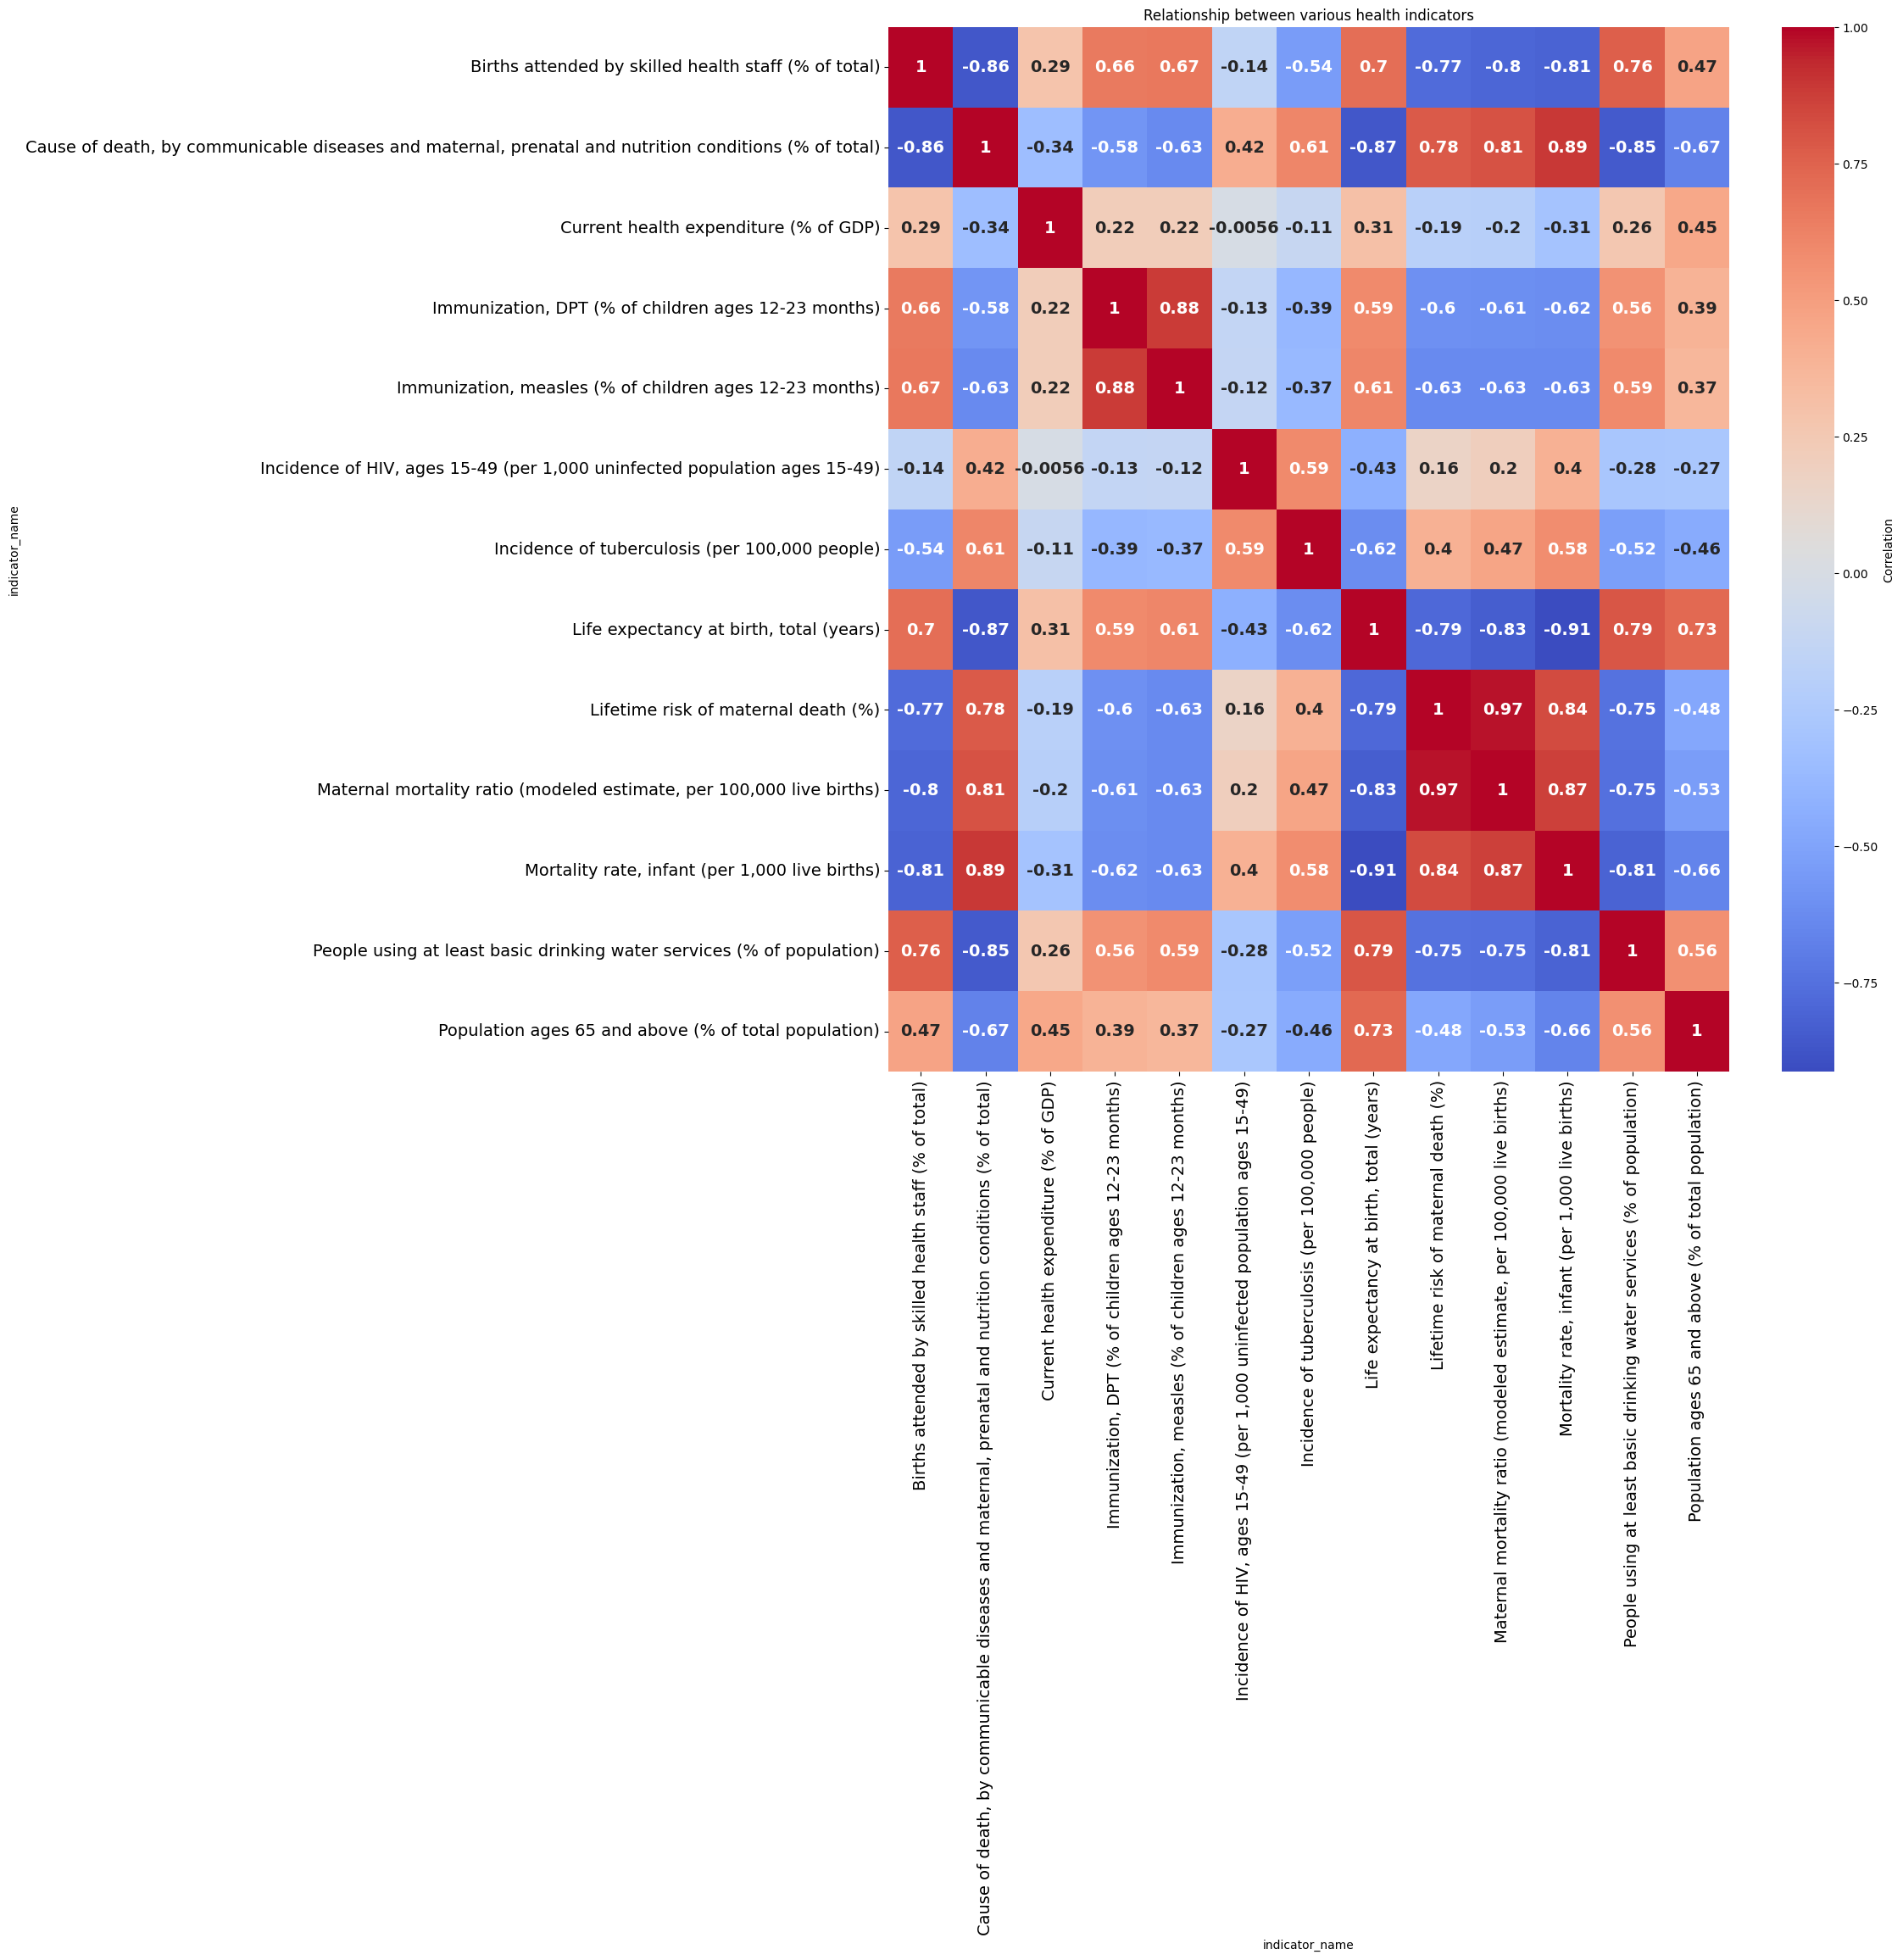

In [31]:
# Pivot the 'health' dataframe to create a wide format dataframe for correlation analysis
df_wide = health.pivot_table(index=["country_value","year"],
                             columns="indicator_name",
                             values="value"
                             )
# Calculate the correlation matrix
corr= df_wide.corr()
# Import seaborn and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(16,16), facecolor="none")
ax= sns.heatmap(
    corr,
    annot=True,
    cmap= "coolwarm",
    cbar_kws= {"label":"Correlation"},
    annot_kws= {"fontsize":14, "fontweight":"bold"}
)
# Set the title of the heatmap
plt.title("Relationship between various health indicators")

# Adjust the tick parameters for better readability
ax.tick_params(axis="x",labelsize=14)
ax.tick_params(axis="y",labelsize=14)
# Display the heatmap
plt.show()

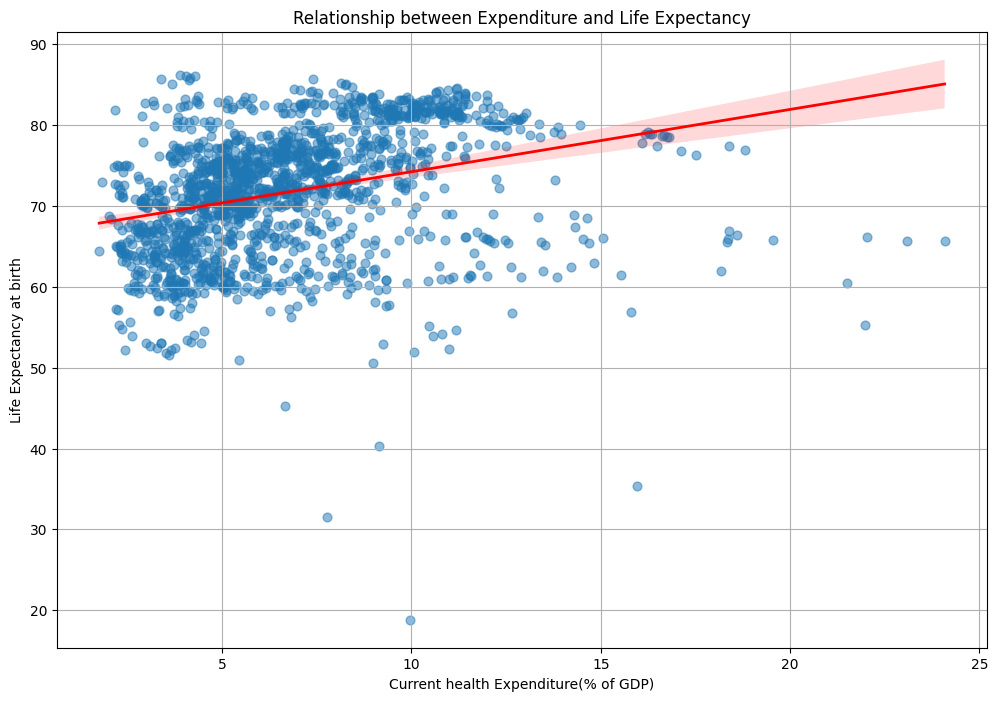

In [32]:
# Pivot the 'health' dataframe to create a wide format dataframe and reset the index
df_pivot= health.pivot(index=["country_value", "year"], columns="indicator_name", values="value").reset_index()

# Create a figure for the plot
plt.figure(figsize=(12,8), facecolor="none")

# Create a regression plot to visualize the relationship between health expenditure and life expectancy
ax=sns.regplot(data=df_pivot,
               x="Current health expenditure (% of GDP)",
               y="Life expectancy at birth, total (years)",
               scatter_kws= {"alpha":0.5, "s":40},
               line_kws={"color":"red","lw":2}
               )

# Set the title and labels for the plot
plt.title("Relationship between Expenditure and Life Expectancy")
plt.xlabel("Current health Expenditure(% of GDP)")
plt.ylabel("Life Expectancy at birth")
# Add a grid to the plot
plt.grid(True)
# Display the plot
plt.show()

In [33]:
economic.to_csv("economic.csv")
labour_market.to_csv("labour_market.csv")
trade.to_csv("trade.csv")
poverty.to_csv("poverty.csv")
environment.to_csv("environment.csv")
health.to_csv("health.csv")
technology.to_csv("technology.csv")